In [42]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from specutils import Spectrum1D

In [23]:
from astropy.io import fits
from astropy.table import Table
hdul = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
Table(hdul[1].data)

wavelength,flux
float32,float32
1.1,3.9818735e-19
1.1001,3.9782383e-19
1.1002,3.9055327e-19
1.1003001,3.740623e-19
1.1004,3.549621e-19
1.1005,3.378695e-19
1.1006,3.2762504e-19
...,...
2.4993,4.3789866e-20


In [31]:
import astropy
import seaborn as sns
from astropy.io import fits
fits_image_filename = astropy.io.fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
hdul = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')
data = hdul[0].data
header = hdul[0].header
list(header.keys())

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'EXTEND',
 'EXTNAME',
 'VOCLASS',
 'VOPUB',
 'TITLE',
 'OBJECT',
 'RA',
 'DEC',
 'TMID',
 'TELAPSE',
 'SPEC_VAL',
 'SPEC_BW',
 'TDMIN1',
 'TDMAX1',
 'VOREF',
 'DATE',
 'INSTRUME',
 'DATE-OBS',
 'REFERENC',
 'TELESCOP',
 'HISTORY',
 'HISTORY']

In [32]:
f = fits.open('2M0032_ISAACspec_JHK_nocosmics.fits')  
# The spectrum is in the second HDU of this file.
specdata = f[1].data 
f.close() 

In [33]:
wavelength_unit = u.micron  #using astropy to defien units 
flux_unit = u.erg/u.cm/u.cm/u.s/u.Angstrom

NameError: name 'u' is not defined

In [15]:
lamb = 10**specdata['wavelength'] * wavelength_unit # u.AA 
flux = specdata['flux'] * flux_unit #10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

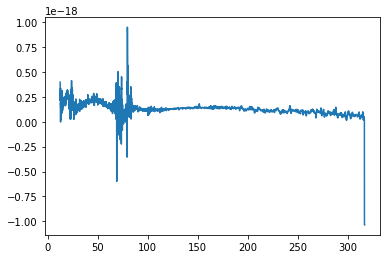

In [16]:
f, ax = plt.subplots()  
ax.step(spec.spectral_axis, spec.flux) 

In [17]:
from glob import glob
import astropy.io.fits as pyfits
from matplotlib import pyplot as plt


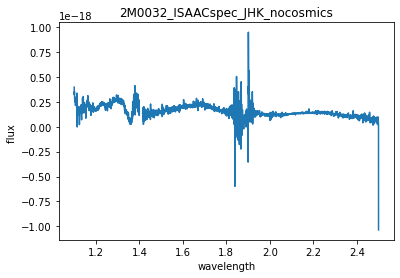

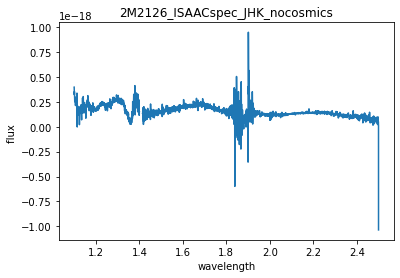

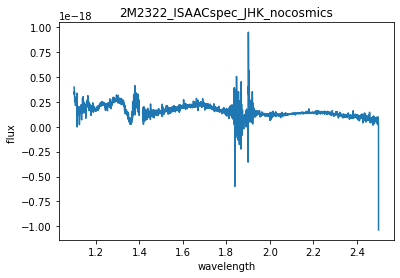

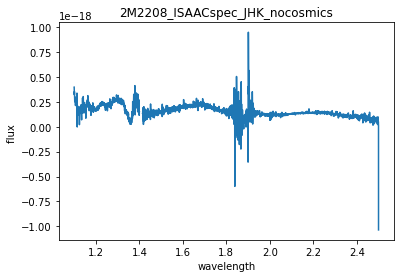

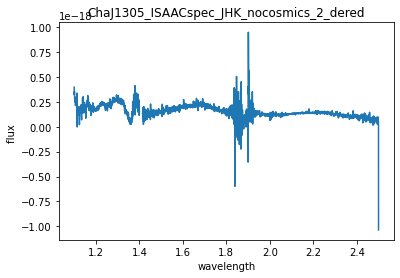

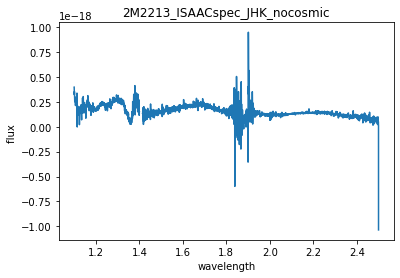

In [18]:
files = glob('*.fits')
fits_data_dir = 'pngs/'

for file_name in files:
    data = pyfits.getdata(file_name)
    name = file_name[:-len('.fits')] # Remove .fits from the file name

    wavelength       = data['wavelength']
    flux = data['flux']

    plt.plot(wavelength, flux)

    plt.xlabel('wavelength')
    plt.ylabel('flux ')
    plt.title(name)

    plt.savefig(fits_data_dir + name + '.png')
    plt.show()